In [ ]:
!pip install kaggle==1.8

#### Restart Session

In [ ]:
# Kaggle 패키지 버전 확인
!pip show kaggle

Name: kaggle
Version: 1.8.0
Summary: Access Kaggle resources anywhere
Home-page: https://github.com/Kaggle/kaggle-api
Author: 
Author-email: Kaggle <support@kaggle.com>
License: Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or indirect, to cause the
      direction or management of such entity, w

In [ ]:
# Colab secrets에서 키 값을 읽어온다.
from google.colab import userdata
import os

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [ ]:
# os.environ['KAGGLE_USERNAME'], os.environ['KAGGLE_KEY']

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 95% 775M/812M [00:07<00:00, 82.5MB/s]
100% 812M/812M [00:07<00:00, 119MB/s] 


In [ ]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip /content/train.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: t

In [ ]:
import os

# /content/train 폴더 내부의 파일 목록과 파일 갯수 확인
fileNames = os.listdir('/content/train')
fileNames[:10]

['cat.12269.jpg',
 'cat.1022.jpg',
 'cat.7616.jpg',
 'cat.5245.jpg',
 'dog.2062.jpg',
 'cat.314.jpg',
 'cat.4555.jpg',
 'dog.3567.jpg',
 'dog.622.jpg',
 'cat.878.jpg']

In [ ]:
# fileNames 리스트중에서 'dog'로 시작되는 파일명 찾기
dog_files = [f for f in fileNames if f.startswith('dog')]
print(f"Found {len(dog_files)} files starting with 'dog'.")
print("First 10 dog files:")
for i, file_name in enumerate(dog_files[:10]):
    print(f"- {file_name}")


Found 12500 files starting with 'dog'.
First 10 dog files:
- dog.2062.jpg
- dog.3567.jpg
- dog.622.jpg
- dog.5645.jpg
- dog.5588.jpg
- dog.388.jpg
- dog.5062.jpg
- dog.9499.jpg
- dog.7991.jpg
- dog.4560.jpg


In [ ]:
cat_files = [f for f in fileNames if f.startswith('cat')]
print(f"Found {len(cat_files)} files starting with 'cat'.")
print("First 10 cat files:")
for i, file_name in enumerate(cat_files[:10]):
    print(f"- {file_name}")

Found 12500 files starting with 'cat'.
First 10 cat files:
- cat.12269.jpg
- cat.1022.jpg
- cat.7616.jpg
- cat.5245.jpg
- cat.314.jpg
- cat.4555.jpg
- cat.878.jpg
- cat.10453.jpg
- cat.10910.jpg
- cat.9952.jpg


또는 fileNames 데이터프레임을 생성해서 넣기

In [ ]:
import pandas as pd

df_files = pd.DataFrame({'filename': fileNames})

# Create a 'label' column based on whether the filename starts with 'dog' or 'cat'
df_files['label'] = df_files['filename'].apply(lambda x: 'dog' if 'dog' in x else 'cat')

print(f"Total files in DataFrame: {len(df_files)}")
display(df_files.head())

Total files in DataFrame: 25000


,filename,label
0,cat.12269.jpg,cat
1,cat.1022.jpg,cat
2,cat.7616.jpg,cat
3,cat.5245.jpg,cat
4,dog.2062.jpg,dog


In [ ]:
# 1. /content/small_ds라는 폴더를 생성하고
# 2. /content/train 폴더 안에서 dog.0.jpg ~ dog.1999.jpg 를 /content/small_ds/dog 폴더로 복사
# 3. /content/train 폴더 안에서 cat.0.jpg ~ cat.1999.jpg 를 /content/small_ds/cat 폴더로 복사

In [ ]:
import os
import shutil

# 1. Create the /content/small_ds folder
base_dir = '/content/small_ds'
os.makedirs(base_dir, exist_ok=True)

# Create subdirectories for dog and cat
dog_dir = os.path.join(base_dir, 'dog')
cat_dir = os.path.join(base_dir, 'cat')

os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)

print(f"Created directories: {dog_dir} and {cat_dir}")

# Source directory for original images
train_src_dir = '/content/train'

# 2. Copy dog.0.jpg ~ dog.1999.jpg to /content/small_ds/dog/
print("Copying dog images...")
for i in range(2000):
    src_file = os.path.join(train_src_dir, f'dog.{i}.jpg')
    dst_file = os.path.join(dog_dir, f'dog.{i}.jpg')
    if os.path.exists(src_file):
        shutil.copyfile(src_file, dst_file)
    else:
        print(f"Warning: {src_file} not found. Skipping.")

# 3. Copy cat.0.jpg ~ cat.1999.jpg to /content/small_ds/cat/
print("Copying cat images...")
for i in range(2000):
    src_file = os.path.join(train_src_dir, f'cat.{i}.jpg')
    dst_file = os.path.join(cat_dir, f'cat.{i}.jpg')
    if os.path.exists(src_file):
        shutil.copyfile(src_file, dst_file)
    else:
        print(f"Warning: {src_file} not found. Skipping.")

print("Image copying complete.")

# Verify the number of files copied
print(f"Number of dog images in {dog_dir}: {len(os.listdir(dog_dir))}")
print(f"Number of cat images in {cat_dir}: {len(os.listdir(cat_dir))}")

Created directories: /content/small_ds/dog and /content/small_ds/cat
Copying dog images...
Copying cat images...
Image copying complete.
Number of dog images in /content/small_ds/dog: 2000
Number of cat images in /content/small_ds/cat: 2000


In [ ]:
# 1. /content/small_ds/cat폴더의 파일을 cat.0.jpg~cat.999.jpg파일까지를 /content/small_ds/train/cat/폴더로 이동
# 2. /content/small_ds/cat폴더의 파일을 cat.1000.jpg~cat.1499.jpg파일까지를 /content/small_ds/valid/cat/폴더로 이동
# 3. /content/small_ds/cat폴더의 파일을 cat.1500.jpg~cat.1999.jpg파일까지를 /content/small_ds/test/cat/폴더로 이동
# 4. /content/small_ds/dog 파일을 dog.0.jpg~dog.999.jpg파일까지를 /content/small_ds/train/dog/폴더로 이동
# 5. /content/small_ds/dog 파일을 dog.1000.jpg~dog.1499.jpg파일까지를 /content/small_ds/valid/dog/폴더로 이동
# 6. /content/small_ds/dog 파일을 dog.1500.jpg~dog.1999.jpg파일까지를 /content/small_ds/test/dog/폴더로 이동

In [ ]:
import os
import shutil

base_ds_dir = '/content/small_ds'

# Define the destination directories
train_dir = os.path.join(base_ds_dir, 'train')
valid_dir = os.path.join(base_ds_dir, 'valid')
test_dir = os.path.join(base_ds_dir, 'test')

# Create the main split directories
os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(valid_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(valid_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dog'), exist_ok=True)

print("Created train, valid, and test directories with cat/dog subfolders.")

source_cat_dir = os.path.join(base_ds_dir, 'cat')
source_dog_dir = os.path.join(base_ds_dir, 'dog')
# 1. Move cat.0.jpg ~ cat.999.jpg to train/cat
print("Moving cat training images...")
for i in range(1000):
    shutil.move(os.path.join(source_cat_dir, f'cat.{i}.jpg'), os.path.join(train_dir, 'cat', f'cat.{i}.jpg'))

# 2. Move cat.1000.jpg ~ cat.1499.jpg to valid/cat
print("Moving cat validation images...")
for i in range(1000, 1500):
    shutil.move(os.path.join(source_cat_dir, f'cat.{i}.jpg'), os.path.join(valid_dir, 'cat', f'cat.{i}.jpg'))

# 3. Move cat.1500.jpg ~ cat.1999.jpg to test/cat
print("Moving cat test images...")
for i in range(1500, 2000):
    shutil.move(os.path.join(source_cat_dir, f'cat.{i}.jpg'), os.path.join(test_dir, 'cat', f'cat.{i}.jpg'))

# 4. Move dog.0.jpg ~ dog.999.jpg to train/dog
print("Moving dog training images...")
for i in range(1000):
    shutil.move(os.path.join(source_dog_dir, f'dog.{i}.jpg'), os.path.join(train_dir, 'dog', f'dog.{i}.jpg'))

# 5. Move dog.1000.jpg ~ dog.1499.jpg to valid/dog
print("Moving dog validation images...")
for i in range(1000, 1500):
    shutil.move(os.path.join(source_dog_dir, f'dog.{i}.jpg'), os.path.join(valid_dir, 'dog', f'dog.{i}.jpg'))

# 6. Move dog.1500.jpg ~ dog.1999.jpg to test/dog
print("Moving dog test images...")
for i in range(1500, 2000):
    shutil.move(os.path.join(source_dog_dir, f'dog.{i}.jpg'), os.path.join(test_dir, 'dog', f'dog.{i}.jpg'))

print("File moving complete.")

# Verify counts
print(f"\nTrain Cat images: {len(os.listdir(os.path.join(train_dir, 'cat')))}")
print(f"Train Dog images: {len(os.listdir(os.path.join(train_dir, 'dog')))}")
print(f"Valid Cat images: {len(os.listdir(os.path.join(valid_dir, 'cat')))}")
print(f"Valid Dog images: {len(os.listdir(os.path.join(valid_dir, 'dog')))}")
print(f"Test Cat images: {len(os.listdir(os.path.join(test_dir, 'cat')))}")
print(f"Test Dog images: {len(os.listdir(os.path.join(test_dir, 'dog')))}")

Created train, valid, and test directories with cat/dog subfolders.
Moving cat training images...
Moving cat validation images...
Moving cat test images...
Moving dog training images...
Moving dog validation images...
Moving dog test images...
File moving complete.

Train Cat images: 1000
Train Dog images: 1000
Valid Cat images: 500
Valid Dog images: 500
Test Cat images: 500
Test Dog images: 500


In [ ]:
# /content/small_ds/cat과 /content/small_ds/dog폴더는 파일이 없을시에 삭제

In [ ]:
import os

base_ds_dir = '/content/small_ds'

cat_old_dir = os.path.join(base_ds_dir, 'cat')
dog_old_dir = os.path.join(base_ds_dir, 'dog')

# Check and remove /content/small_ds/cat if empty
if os.path.exists(cat_old_dir) and not os.listdir(cat_old_dir):
    os.rmdir(cat_old_dir)
    print(f"Removed empty directory: {cat_old_dir}")
elif os.path.exists(cat_old_dir):
    print(f"Directory {cat_old_dir} is not empty. Skipping removal.")
else:
    print(f"Directory {cat_old_dir} does not exist.")

# Check and remove /content/small_ds/dog if empty
if os.path.exists(dog_old_dir) and not os.listdir(dog_old_dir):
    os.rmdir(dog_old_dir)
    print(f"Removed empty directory: {dog_old_dir}")
elif os.path.exists(dog_old_dir):
    print(f"Directory {dog_old_dir} is not empty. Skipping removal.")
else:
    print(f"Directory {dog_old_dir} does not exist.")

Removed empty directory: /content/small_ds/cat
Removed empty directory: /content/small_ds/dog


### 탐색적 데이터 분석(EDA)

1. 클래스간 데이터 균형을 확인

In [ ]:
# /content/small_ds/train 의 하위 폴더인 cat과 dog폴더의 이미지의 갯수를 확인
import os

train_cat_dir = '/content/small_ds/train/cat'
train_dog_dir = '/content/small_ds/train/dog'

num_cat_train = len(os.listdir(train_cat_dir))
num_dog_train = len(os.listdir(train_dog_dir))

print(f"Number of cat images in {train_cat_dir}: {num_cat_train}")
print(f"Number of dog images in {train_dog_dir}: {num_dog_train}")

Number of cat images in /content/small_ds/train/cat: 1000
Number of dog images in /content/small_ds/train/dog: 1000


Displaying random cat images...


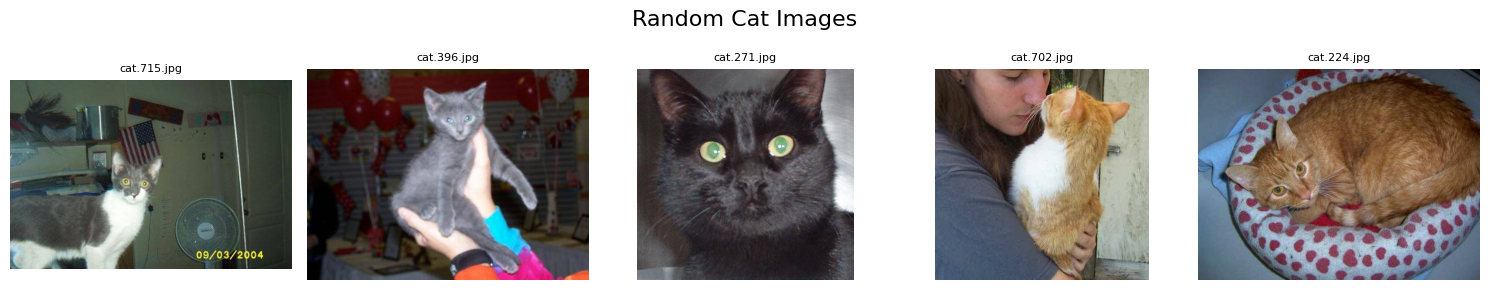


Displaying random dog images...


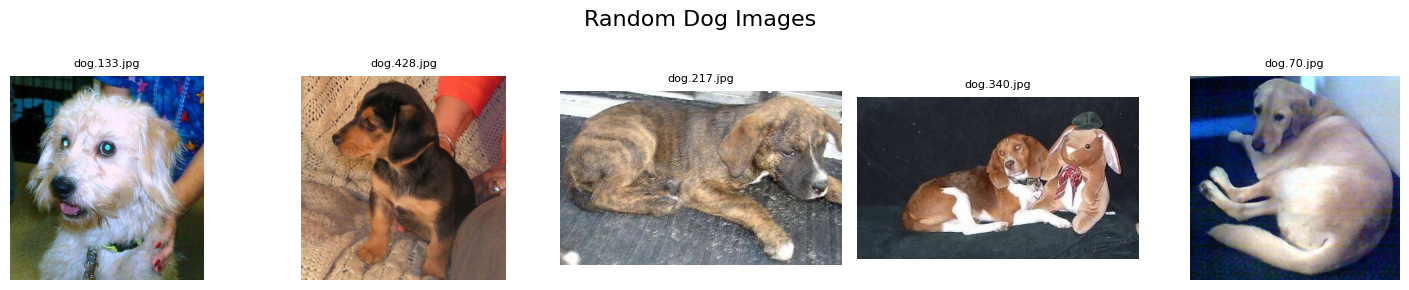

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 랜덤하게 이미지를 폴더별로 5장씩 선택하여 출력

dataPath = '/content/small_ds'

train_cat_dir = os.path.join(dataPath, 'train/cat')
train_dog_dir = os.path.join(dataPath, 'train/dog')

def display_random_images(directory, label, num_images=5):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not files:
        print(f"No image files found in {directory}")
        return

    selected_files = random.sample(files, min(num_images, len(files)))

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Random {label} Images", fontsize=16)
    for i, img_path in enumerate(selected_files):
        ax = plt.subplot(1, num_images, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(os.path.basename(img_path), fontsize=8)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

print("Displaying random cat images...")
display_random_images(train_cat_dir, 'Cat')

print("\nDisplaying random dog images...")
display_random_images(train_dog_dir, 'Dog')

In [ ]:
# 랜덤하게 선택된 이미지 5장의 이미지 사이즈를 확인
# 이미지의 크기가 서로 다 다른 것을 확인

import os
import random
from PIL import Image

dataPath = '/content/small_ds'

train_cat_dir = os.path.join(dataPath, 'train/cat')
train_dog_dir = os.path.join(dataPath, 'train/dog')

def get_random_image_sizes(directory, label, num_images=5):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not files:
        print(f"No image files found in {directory}")
        return

    selected_files = random.sample(files, min(num_images, len(files)))

    print(f"\nRandom {label} Image Sizes:")
    for img_path in selected_files:
        try:
            with Image.open(img_path) as img:
                print(f"- {os.path.basename(img_path)}: {img.size} (width, height)")
        except Exception as e:
            print(f"- Error opening {os.path.basename(img_path)}: {e}")

get_random_image_sizes(train_cat_dir, 'Cat')
get_random_image_sizes(train_dog_dir, 'Dog')


Random Cat Image Sizes:
- cat.380.jpg: (500, 374) (width, height)
- cat.355.jpg: (220, 249) (width, height)
- cat.23.jpg: (334, 256) (width, height)
- cat.38.jpg: (350, 337) (width, height)
- cat.699.jpg: (446, 499) (width, height)

Random Dog Image Sizes:
- dog.736.jpg: (480, 359) (width, height)
- dog.167.jpg: (480, 359) (width, height)
- dog.659.jpg: (442, 500) (width, height)
- dog.573.jpg: (359, 268) (width, height)
- dog.688.jpg: (240, 166) (width, height)


### 전처리

In [ ]:
# kaggle dogs-vs-cats 데이터셋의 모델링을 위한 전처리

#### 작업 (Task)
'dogs-vs-cats' 데이터셋을 위한 이미지 전처리 및 데이터 증강을 설정하세요. 이를 위해 목표 이미지 차원(예: 150x150 픽셀)과 배치 크기를 정의하고, 훈련 세트를 위한 ImageDataGenerator를 증강 기법(재조정, 전단, 확대/축소, 수평 뒤집기, 채우기 모드)을 사용하여 구성하며, 검증 및 테스트 세트를 위한 별도의 ImageDataGenerator 인스턴스는 픽셀 재조정만 적용하여 구성합니다. 그런 다음, 이 제너레이터들을 사용하여 해당 훈련, 검증 및 테스트 디렉토리("/content/small_ds/train", "/content/small_ds/valid", "/content/small_ds/test")에서 데이터 흐름을 생성하여 모델 훈련을 위한 준비를 완료합니다.

In [ ]:
# 하이퍼 파라메터 설정
image_width = 150
image_height = 150
image_size = (image_width, image_height)
batch_size = 32

print(f"Image dimensions: {image_size}")
print(f"Batch size: {batch_size}")

Image dimensions: (150, 150)
Batch size: 32


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configure ImageDataGenerator for the training set with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    shear_range=0.2,         # Apply shear transformations
    zoom_range=0.2,          # Apply random zoom to images
    horizontal_flip=True,    # Randomly flip inputs horizontally
    fill_mode='nearest'      # Strategy for filling in new pixels
)

print("ImageDataGenerator for training (train_datagen) configured with augmentation.")

ImageDataGenerator for training (train_datagen) configured with augmentation.


Validation data와 test data를 위한 전처리 과정 추가.<br>


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configure ImageDataGenerator for the validation set (only rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

# Configure ImageDataGenerator for the test set (only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

print("ImageDataGenerator for validation (validation_datagen) configured with rescaling.")
print("ImageDataGenerator for test (test_datagen) configured with rescaling.")

ImageDataGenerator for validation (validation_datagen) configured with rescaling.
ImageDataGenerator for test (test_datagen) configured with rescaling.


**Reasoning**:
The next step is to create data flows from the respective training, validation, and test directories using the configured `ImageDataGenerator` instances. This will prepare the image data for model training.



In [ ]:
train_dir = '/content/small_ds/train'
valid_dir = '/content/small_ds/valid'
test_dir = '/content/small_ds/test'

# Create data flow for the training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Create data flow for the validation set
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Create data flow for the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False # Keep data in order for evaluation
)

print("Data flows (train_generator, validation_generator, test_generator) created.")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Data flows (train_generator, validation_generator, test_generator) created.


### 모델 생성

In [ ]:
# 이미지를 분류하기 위한 CNN 모델 생성

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Initialize the Sequential model
# model = Sequential()

# # Add Convolutional and Pooling layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# # Flatten the output before feeding to Dense layers
# model.add(Flatten())

# # Add Dense layers
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# # Print the model summary
# print("CNN Model Architecture:")
# model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print("Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.


In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# # callback함수 추가 (ModelCheckpoint, EarlyStopping, ReduceLROnPlateau)
# checkpoint_filepath = 'best_model.weights.h5'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='auto',
#     save_best_only=True,
#     verbose=1
# )

# early_stopping_callback = EarlyStopping(
#     monitor='val_accuracy',
#     patience=15,
#     mode='auto',
#     restore_best_weights=True,
#     verbose=1
# )

# reduce_lr_callback = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=8,
#     mode='min',
#     min_lr=0.0001,
#     verbose=1
# )

# callbacks = [model_checkpoint_callback, early_stopping_callback, reduce_lr_callback]

# print("ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau instances defined.")

ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau instances defined.


In [ ]:
# history = model.fit(
#     train_generator,
#     epochs=50, # Set epochs to 10 as an example
#     validation_data=validation_generator,
#     callbacks=callbacks
# )

# print("Model training complete. History stored in 'history' variable.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 9/63 ━━━━━━━━━━━━━━━━━━━━ 1:47 2s/step - accuracy: 0.4849 - loss: 1.0662

KeyboardInterrupt: 

In [ ]:
# import matplotlib.pyplot as plt

# # Create a figure with two subplots
# plt.figure(figsize=(12, 5))

# # Plot training and validation accuracy
# plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # Plot training and validation loss
# plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout() # Adjust layout to prevent overlapping
# plt.show()

In [ ]:
# # 모델 평가(evaluate)
# test_loss, test_accuracy = model.evaluate(test_generator)

# print(f"\nTest Loss: {test_loss:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

# TL - Xception 모델과 비교

In [ ]:
# Xception 모델을 가져와서 이진 분류 모델로 변경하여 모델 구성

In [ ]:
from tensorflow.keras.applications import Xception

# Define the input shape based on previously defined image_width and image_height
input_shape = (image_width, image_height, 3)

# Load the Xception model pre-trained on ImageNet, without its top classification layer
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

# Display the model summary to confirm the architecture
print("Xception base model loaded successfully:")
base_model.summary()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Freeze the layers of the base model
base_model.trainable = False

# Add new classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Use GlobalAveragePooling2D instead of Flatten for better performance
x = Dense(256, activation='relu')(x) # A dense layer for feature learning
predictions = Dense(1, activation='sigmoid')(x) # Output layer for binary classification

# Create the new model
model_xception = Model(inputs=base_model.input, outputs=predictions)

print("Xception-based model with custom classification head created:")
model_xception.summary()

In [ ]:
model_xception.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Xception-based model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.")

Xception-based model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_filepath_xception = 'best_model_xception.keras' # Changed extension to .keras for saving the whole model
model_checkpoint_callback_xception = ModelCheckpoint(
    filepath=checkpoint_filepath_xception,
    save_weights_only=False, # Set to False to save the entire model
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping_callback_xception = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

reduce_lr_callback_xception = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    mode='min',
    min_lr=0.00001,
    verbose=1
)

callbacks_xception = [model_checkpoint_callback_xception, early_stopping_callback_xception, reduce_lr_callback_xception]

print("ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau instances defined for Xception model.")

ModelCheckpoint, EarlyStopping, and ReduceLROnPlateau instances defined for Xception model.


In [ ]:
history_xception = model_xception.fit(
    train_generator,
    epochs=25, # Using 25 epochs as a starting point, similar to the previous model
    validation_data=validation_generator,
    callbacks=callbacks_xception
)

print("Xception model training complete. History stored in 'history_xception' variable.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9039 - loss: 0.2009
Epoch 1: val_accuracy improved from -inf to 0.96700, saving model to best_model_xception.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 701ms/step - accuracy: 0.9045 - loss: 0.1999 - val_accuracy: 0.9670 - val_loss: 0.0885 - learning_rate: 0.0010
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9666 - loss: 0.0744
Epoch 2: val_accuracy did not improve from 0.96700
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.9666 - loss: 0.0745 - val_accuracy: 0.9490 - val_loss: 0.1446 - learning_rate: 0.0010
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9635 - loss: 0.1000
Epoch 3: val_accuracy did not improve from 0.96700
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 257ms/step - accuracy: 0.9636 - loss: 0.0998 - val_accuracy: 0.9650 - val_loss: 0.0888 - learning_rate: 0.0010
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.9797 - loss: 0.0523
Epoch 4: val_accuracy did not imp

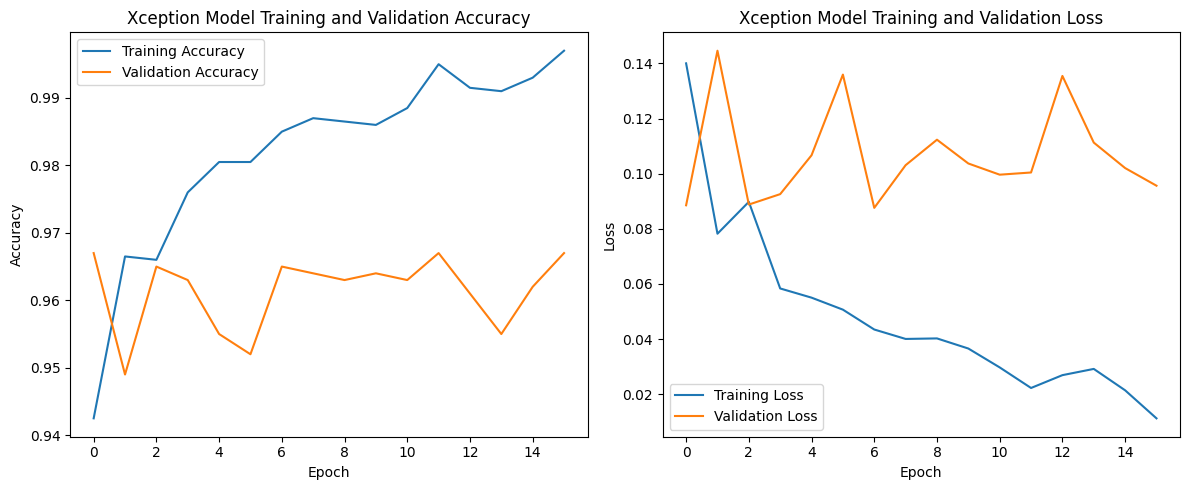

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history_xception.history['accuracy'], label='Training Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Xception Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history_xception.history['loss'], label='Training Loss')
plt.plot(history_xception.history['val_loss'], label='Validation Loss')
plt.title('Xception Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
test_loss_xception, test_accuracy_xception = model_xception.evaluate(test_generator)

print(f"\nXception Model Test Loss: {test_loss_xception:.4f}")
print(f"Xception Model Test Accuracy: {test_accuracy_xception:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9665 - loss: 0.0922

Xception Model Test Loss: 0.0975
Xception Model Test Accuracy: 0.9620


In [ ]:
# weight만 저장했었는데, 모델 구조까지 저장하게 수정

In [ ]:
# 구글 드라이브 마운트 하는 코드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# /content/best_model_xception.weights.h5 파일을
# 내 구글 드라이브(/content/drive/MyDrive/EST_AI_MODEL_15th/code/Keras/save_model)에 복사



In [ ]:
import shutil
import os

source_file = '/content/best_model_xception.keras'
destination_dir = '/content/drive/MyDrive/ai개발/데이터사이언스_기초수학/Keras/save_model'

# Create the destination directory if it does not exist
os.makedirs(destination_dir, exist_ok=True)

destination_file = os.path.join(destination_dir, os.path.basename(source_file))

try:
    shutil.copyfile(source_file, destination_file)
    print(f"Successfully copied {source_file} to {destination_file}")
except FileNotFoundError:
    print(f"Error: Source file {source_file} not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully copied /content/best_model_xception.keras to /content/drive/MyDrive/ai개발/데이터사이언스_기초수학/Keras/save_model/best_model_xception.keras


In [ ]:
# 이미지 파일이 저장된 경로를 입력하면 앞에서 만들어진 모델을 사용하여 결과를 알려주는 함수를 생성

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_dog_or_cat(image_path, model, target_size=(150, 150)):
    """
    이미지 파일 경로를 입력받아 모델을 사용하여 개 또는 고양이를 예측하는 함수.

    Args:
        image_path (str): 예측할 이미지 파일의 경로.
        model (keras.Model): 훈련된 Keras 모델.
        target_size (tuple): 모델이 예상하는 이미지 크기 (width, height).

    Returns:
        str: 예측 결과 ('dog' 또는 'cat').
        float: 예측 확률.
    """
    # 이미지 로드 및 크기 조정
    img = image.load_img(image_path, target_size=target_size)
    # 이미지를 배열로 변환
    img_array = image.img_to_array(img)
    # 배치 차원 추가 (모델은 배치 입력을 예상)
    img_array = np.expand_dims(img_array, axis=0)
    # 픽셀 값 재조정 (0-1 범위로 정규화)
    img_array = img_array / 255.0

    # 예측 수행
    prediction = model.predict(img_array)[0][0]

    # 예측 결과 해석
    if prediction >= 0.5:
        label = 'dog'
    else:
        label = 'cat'

    return label, prediction

print("predict_dog_or_cat 함수가 생성되었습니다.")

# 예시 사용 (테스트용 이미지 필요)
test_image_path = '/content/predict/cat1.jpg'
predicted_label, probability = predict_dog_or_cat(test_image_path, model_xception)
print(f"Image: {test_image_path} => Predicted: {predicted_label} (Probability: {probability:.4f})")

predict_dog_or_cat 함수가 생성되었습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Image: /content/predict/cat1.jpg => Predicted: cat (Probability: 0.0012)


In [ ]:
test_image_path = '/content/predict/dog1.jpg'
predicted_label, probability = predict_dog_or_cat(test_image_path, model_xception)
print(f"Image: {test_image_path} => Predicted: {predicted_label} (Probability: {probability:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: /content/predict/dog1.jpg => Predicted: dog (Probability: 0.9994)
